# Initialization
## Code to initialize the notebook.

In [1]:
!pip install seaborn
!pip install plotly

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [3]:
#Data Dictionary

data_dictionary = []
data_dictionary.append({"name":"acc_now_delinq","desc":"The number of accounts on which the borrower is now delinquent."})
data_dictionary.append({"name":"acc_open_past_24mths","desc":"Number of trades opened in past 24 months."})
data_dictionary.append({"name":"addr_state","desc":"The state provided by the borrower in the loan application"})
data_dictionary.append({"name":"all_util","desc":"Balance to credit limit on all trades"})
data_dictionary.append({"name":"annual_inc","desc":"The self-reported annual income provided by the borrower during registration."})
data_dictionary.append({"name":"annual_inc_joint","desc":"The combined self-reported annual income provided by the co-borrowers during registration"})
data_dictionary.append({"name":"application_type","desc":"Indicates whether the loan is an individual application or a joint application with two co-borrowers"})
data_dictionary.append({"name":"avg_cur_bal","desc":"Average current balance of all accounts"})
data_dictionary.append({"name":"bc_open_to_buy","desc":"Total open to buy on revolving bankcards."})
data_dictionary.append({"name":"bc_util","desc":"Ratio of total current balance to high credit/credit limit for all bankcard accounts."})
data_dictionary.append({"name":"chargeoff_within_12_mths","desc":"Number of charge-offs within 12 months"})
data_dictionary.append({"name":"collection_recovery_fee","desc":"post charge off collection fee"})
data_dictionary.append({"name":"collections_12_mths_ex_med","desc":"Number of collections in 12 months excluding medical collections"})
data_dictionary.append({"name":"delinq_2yrs","desc":"The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years"})
data_dictionary.append({"name":"delinq_amnt","desc":"The past-due amount owed for the accounts on which the borrower is now delinquent."})
data_dictionary.append({"name":"desc","desc":"Loan description provided by the borrower"})
data_dictionary.append({"name":"dti","desc":"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."})
data_dictionary.append({"name":"dti_joint","desc":"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"})
data_dictionary.append({"name":"earliest_cr_line","desc":"The month the borrower's earliest reported credit line was opened"})
data_dictionary.append({"name":"emp_length","desc":"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. "})
data_dictionary.append({"name":"emp_title","desc":"The job title supplied by the Borrower when applying for the loan.*"})
data_dictionary.append({"name":"funded_amnt","desc":"The total amount committed to that loan at that point in time."})
data_dictionary.append({"name":"funded_amnt_inv","desc":"The total amount committed by investors for that loan at that point in time."})
data_dictionary.append({"name":"grade","desc":"LC assigned loan grade"})
data_dictionary.append({"name":"home_ownership","desc":"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."})
data_dictionary.append({"name":"id","desc":"A unique LC assigned ID for the loan listing."})
data_dictionary.append({"name":"il_util","desc":"Ratio of total current balance to high credit/credit limit on all install acct"})
data_dictionary.append({"name":"initial_list_status","desc":"The initial listing status of the loan. Possible values are – W, F"})
data_dictionary.append({"name":"inq_fi","desc":"Number of personal finance inquiries"})
data_dictionary.append({"name":"inq_last_12m","desc":"Number of credit inquiries in past 12 months"})
data_dictionary.append({"name":"inq_last_6mths","desc":"The number of inquiries in past 6 months (excluding auto and mortgage inquiries)"})
data_dictionary.append({"name":"installment","desc":"The monthly payment owed by the borrower if the loan originates."})
data_dictionary.append({"name":"int_rate","desc":"Interest Rate on the loan"})
data_dictionary.append({"name":"issue_d","desc":"The month which the loan was funded"})
data_dictionary.append({"name":"last_credit_pull_d","desc":"The most recent month LC pulled credit for this loan"})
data_dictionary.append({"name":"last_pymnt_amnt","desc":"Last total payment amount received"})
data_dictionary.append({"name":"last_pymnt_d","desc":"Last month payment was received"})
data_dictionary.append({"name":"loan_amnt","desc":"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."})
data_dictionary.append({"name":"loan_status","desc":"Current status of the loan"})
data_dictionary.append({"name":"max_bal_bc","desc":"Maximum current balance owed on all revolving accounts"})
data_dictionary.append({"name":"member_id","desc":"A unique LC assigned Id for the borrower member."})
data_dictionary.append({"name":"mo_sin_old_il_acct","desc":"Months since oldest bank installment account opened"})
data_dictionary.append({"name":"mo_sin_old_rev_tl_op","desc":"Months since oldest revolving account opened"})
data_dictionary.append({"name":"mo_sin_rcnt_rev_tl_op","desc":"Months since most recent revolving account opened"})
data_dictionary.append({"name":"mo_sin_rcnt_tl","desc":"Months since most recent account opened"})
data_dictionary.append({"name":"mort_acc","desc":"Number of mortgage accounts."})
data_dictionary.append({"name":"mths_since_last_delinq","desc":"The number of months since the borrower's last delinquency."})
data_dictionary.append({"name":"mths_since_last_major_derog","desc":"Months since most recent 90-day or worse rating"})
data_dictionary.append({"name":"mths_since_last_record","desc":"The number of months since the last public record."})
data_dictionary.append({"name":"mths_since_rcnt_il","desc":"Months since most recent installment accounts opened"})
data_dictionary.append({"name":"mths_since_recent_bc","desc":"Months since most recent bankcard account opened."})
data_dictionary.append({"name":"mths_since_recent_bc_dlq","desc":"Months since most recent bankcard delinquency"})
data_dictionary.append({"name":"mths_since_recent_inq","desc":"Months since most recent inquiry."})
data_dictionary.append({"name":"mths_since_recent_revol_delinq","desc":"Months since most recent revolving delinquency."})
data_dictionary.append({"name":"next_pymnt_d","desc":"Next scheduled payment date"})
data_dictionary.append({"name":"num_accts_ever_120_pd","desc":"Number of accounts ever 120 or more days past due"})
data_dictionary.append({"name":"num_actv_bc_tl","desc":"Number of currently active bankcard accounts"})
data_dictionary.append({"name":"num_actv_rev_tl","desc":"Number of currently active revolving trades"})
data_dictionary.append({"name":"num_bc_sats","desc":"Number of satisfactory bankcard accounts"})
data_dictionary.append({"name":"num_bc_tl","desc":"Number of bankcard accounts"})
data_dictionary.append({"name":"num_il_tl","desc":"Number of installment accounts"})
data_dictionary.append({"name":"num_op_rev_tl","desc":"Number of open revolving accounts"})
data_dictionary.append({"name":"num_rev_accts","desc":"Number of revolving accounts"})
data_dictionary.append({"name":"num_rev_tl_bal_gt_0","desc":"Number of revolving trades with balance >0"})
data_dictionary.append({"name":"num_sats","desc":"Number of satisfactory accounts"})
data_dictionary.append({"name":"num_tl_120dpd_2m","desc":"Number of accounts currently 120 days past due (updated in past 2 months)"})
data_dictionary.append({"name":"num_tl_30dpd","desc":"Number of accounts currently 30 days past due (updated in past 2 months)"})
data_dictionary.append({"name":"num_tl_90g_dpd_24m","desc":"Number of accounts 90 or more days past due in last 24 months"})
data_dictionary.append({"name":"num_tl_op_past_12m","desc":"Number of accounts opened in past 12 months"})
data_dictionary.append({"name":"open_acc","desc":"The number of open credit lines in the borrower's credit file."})
data_dictionary.append({"name":"open_acc_6m","desc":"Number of open trades in last 6 months"})
data_dictionary.append({"name":"open_il_12m","desc":"Number of installment accounts opened in past 12 months"})
data_dictionary.append({"name":"open_il_24m","desc":"Number of installment accounts opened in past 24 months"})
data_dictionary.append({"name":"open_il_6m","desc":"Number of currently active installment trades"})
data_dictionary.append({"name":"open_rv_12m","desc":"Number of revolving trades opened in past 12 months"})
data_dictionary.append({"name":"open_rv_24m","desc":"Number of revolving trades opened in past 24 months"})
data_dictionary.append({"name":"out_prncp","desc":"Remaining outstanding principal for total amount funded"})
data_dictionary.append({"name":"out_prncp_inv","desc":"Remaining outstanding principal for portion of total amount funded by investors"})
data_dictionary.append({"name":"pct_tl_nvr_dlq","desc":"Percent of trades never delinquent"})
data_dictionary.append({"name":"percent_bc_gt_75","desc":"Percentage of all bankcard accounts > 75% of limit."})
data_dictionary.append({"name":"policy_code","desc":"publicly available policy_code=1 new products not publicly available policy_code=2"})
data_dictionary.append({"name":"pub_rec","desc":"Number of derogatory public records"})
data_dictionary.append({"name":"pub_rec_bankruptcies","desc":"Number of public record bankruptcies"})
data_dictionary.append({"name":"purpose","desc":"A category provided by the borrower for the loan request. "})
data_dictionary.append({"name":"pymnt_plan","desc":"Indicates if a payment plan has been put in place for the loan"})
data_dictionary.append({"name":"recoveries","desc":"post charge off gross recovery"})
data_dictionary.append({"name":"revol_bal","desc":"Total credit revolving balance"})
data_dictionary.append({"name":"revol_util","desc":"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."})
data_dictionary.append({"name":"sub_grade","desc":"LC assigned loan subgrade"})
data_dictionary.append({"name":"tax_liens","desc":"Number of tax liens"})
data_dictionary.append({"name":"term","desc":"The number of payments on the loan. Values are in months and can be either 36 or 60."})
data_dictionary.append({"name":"title","desc":"The loan title provided by the borrower"})
data_dictionary.append({"name":"tot_coll_amt","desc":"Total collection amounts ever owed"})
data_dictionary.append({"name":"tot_cur_bal","desc":"Total current balance of all accounts"})
data_dictionary.append({"name":"tot_hi_cred_lim","desc":"Total high credit/credit limit"})
data_dictionary.append({"name":"total_acc","desc":"The total number of credit lines currently in the borrower's credit file"})
data_dictionary.append({"name":"total_bal_ex_mort","desc":"Total credit balance excluding mortgage"})
data_dictionary.append({"name":"total_bal_il","desc":"Total current balance of all installment accounts"})
data_dictionary.append({"name":"total_bc_limit","desc":"Total bankcard high credit/credit limit"})
data_dictionary.append({"name":"total_cu_tl","desc":"Number of finance trades"})
data_dictionary.append({"name":"total_il_high_credit_limit","desc":"Total installment high credit/credit limit"})
data_dictionary.append({"name":"total_pymnt","desc":"Payments received to date for total amount funded"})
data_dictionary.append({"name":"total_pymnt_inv","desc":"Payments received to date for portion of total amount funded by investors"})
data_dictionary.append({"name":"total_rec_int","desc":"Interest received to date"})
data_dictionary.append({"name":"total_rec_late_fee","desc":"Late fees received to date"})
data_dictionary.append({"name":"total_rec_prncp","desc":"Principal received to date"})
data_dictionary.append({"name":"total_rev_hi_lim","desc":"Total revolving high credit/credit limit"})
data_dictionary.append({"name":"url","desc":"URL for the LC page with listing data."})
data_dictionary.append({"name":"verification_status","desc":"Indicates if income was verified by LC, not verified, or if the income source was verified"})
data_dictionary.append({"name":"verification_status_joint","desc":"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"})
data_dictionary.append({"name":"zip_code","desc":"The first 3 numbers of the zip code provided by the borrower in the loan application."})



In [4]:
def getDescriptionByColumnName(columnNames):
    desc = []
    for data in data_dictionary:
        for columnName in columnNames:        
            if data["name"] == columnName:
                desc.append(data['desc'])
    return desc
    
   

In [5]:
print(getDescriptionByColumnName(["zip_code"]))

['The first 3 numbers of the zip code provided by the borrower in the loan application.']


In [6]:
df = pd.read_csv("loan.csv", low_memory=False)
df.shape

(39717, 111)

In [7]:
# Method to Combine the information into a single DataFrame

def combinedInfo(df_cleaned):
    # Get the count of null values in each column
    null_counts = df_cleaned.isnull().sum()
    # Get the data types of each column
    data_types = df_cleaned.dtypes
    description = getDescriptionByColumnName(sorted(df_cleaned.columns.to_list()))
    print(len(description))
    detailed_info = pd.DataFrame({
        'Data Type': data_types,
        'Non-Null Count': df_cleaned.count(),
        'Null Count': null_counts,
        'Unique Values': df_cleaned.nunique(),
        'Top': df_cleaned.mode().iloc[0],
        'Freq': df_cleaned.apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else np.nan),
    })

    pd.set_option('display.max_rows', None)  # To display all rows
    pd.set_option('display.max_columns', None)  # To display all columns
    pd.set_option('display.max_colwidth', None)  # To display full column width
    pd.set_option('display.expand_frame_repr', False)  # To display wide DataFrames side by side

    detailed_info = detailed_info.sort_index(axis=0)
    detailed_info["Description"] = description

    # return the detailed information
    return detailed_info


In [8]:
# data ={
#     'col1':sorted([data["name"] for data in data_dictionary]),
#     'col2' : sorted(df.columns)
# }

# col_check = pd.DataFrame(data)
# col_check[col_check.col1 != col_check.col2]

combinedInfo(df)

111


,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq,Description
acc_now_delinq,int64,39717,0,1,0.0,39717.0,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,float64,0,39717,0,NaN,NaN,Number of trades opened in past 24 months.
addr_state,object,39717,0,50,CA,7099.0,The state provided by the borrower in the loan application
all_util,float64,0,39717,0,NaN,NaN,Balance to credit limit on all trades
annual_inc,float64,39717,0,5318,60000.0,1505.0,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,float64,0,39717,0,NaN,NaN,The combined self-reported annual income provided by the co-borrowers during registration
application_type,object,39717,0,1,INDIVIDUAL,39717.0,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,float64,0,39717,0,NaN,NaN,Average current balance of all accounts
bc_open_to_buy,float64,0,39717,0,NaN,NaN,Total open to buy on revolving bankcards.
bc_util,float64,0,39717,0,NaN,NaN,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Step 1 : Cleaning

In [9]:
# Get the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Extract column names with 100% null values
columns_with_nulls = null_percentage[null_percentage >= 75].index.tolist()

columns_with_nulls


['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [10]:
# Drop columns with >=75% null values
df_cleaned = df.drop(columns=columns_with_nulls)

In [11]:
combinedInfo(df_cleaned)

55


,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq,Description
acc_now_delinq,int64,39717,0,1,0.0,39717,The number of accounts on which the borrower is now delinquent.
addr_state,object,39717,0,50,CA,7099,The state provided by the borrower in the loan application
annual_inc,float64,39717,0,5318,60000.0,1505,The self-reported annual income provided by the borrower during registration.
application_type,object,39717,0,1,INDIVIDUAL,39717,Indicates whether the loan is an individual application or a joint application with two co-borrowers
chargeoff_within_12_mths,float64,39661,56,1,0.0,39661,Number of charge-offs within 12 months
collection_recovery_fee,float64,39717,0,2616,0.0,35935,post charge off collection fee
collections_12_mths_ex_med,float64,39661,56,1,0.0,39661,Number of collections in 12 months excluding medical collections
delinq_2yrs,int64,39717,0,11,0.0,35405,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
delinq_amnt,int64,39717,0,1,0.0,39717,The past-due amount owed for the accounts on which the borrower is now delinquent.
desc,object,26775,12942,26526,,210,Loan description provided by the borrower


In [12]:
df_cleaned.shape

(39717, 55)

In [13]:
# identifying columns having null values and trying to impute it.

df_combined = combinedInfo(df_cleaned)
null_columns = df_combined[df_combined["Null Count"] > 0]
null_columns = null_columns.reset_index()
null_columns = null_columns.rename(columns={'index':'column_name'})

column_type_name_map = null_columns.groupby(by="Data Type")["column_name"].apply(list)
column_type_name_map

55


Data Type
float64    [chargeoff_within_12_mths, collections_12_mths_ex_med, mths_since_last_delinq, pub_rec_bankruptcies, tax_liens]
object                                  [desc, emp_length, emp_title, last_credit_pull_d, last_pymnt_d, revol_util, title]
Name: column_name, dtype: object

## 1. Observations
### Below is the analysis columns which still has null in it.
1. Columns which are not related to loan approvals can be removed.
    - mths_since_last_delinq : 
    - collections_12_mths_ex_med
    - chargeoff_within_12_mths
    - emp_title
    - desc
    - last_pymnt_d
    - last_credit_pull_d

2. Remaining columns need to be analysed & imputed.
    - pub_rec_bankruptcies
    - tax_liens
    - emp_length
    - revol_util

In [14]:
# droping columns as per above observations

unused_columns=["mths_since_last_delinq",
     "collections_12_mths_ex_med",
     "chargeoff_within_12_mths",
     "emp_title",
     "desc",
     "last_pymnt_d",
     "last_credit_pull_d"]

df_cleaned = df_cleaned.drop(columns = unused_columns)

df_cleaned.shape


(39717, 48)

In [15]:
#Getting columns which has only single unique values.
df_combined = combinedInfo(df_cleaned)
single_valued_columns = df_combined[df_combined["Unique Values"] == 1]

48


In [16]:
# checking unique column values
df_cleaned[single_valued_columns.index].head()


,acc_now_delinq,application_type,delinq_amnt,initial_list_status,policy_code,pymnt_plan,tax_liens
0,0,INDIVIDUAL,0,f,1,n,0.0
1,0,INDIVIDUAL,0,f,1,n,0.0
2,0,INDIVIDUAL,0,f,1,n,0.0
3,0,INDIVIDUAL,0,f,1,n,0.0
4,0,INDIVIDUAL,0,f,1,n,0.0


## 2. Observation
### Below columns has only single value and thus it will not impact the loan status. We can drop them.
- pymnt_plan
- initial_list_status
- policy_code
- application_type
- acc_now_delinq 
- delinq_amnt 
- tax_liens


In [17]:
# #Dropping the single valued columns
df_cleaned = df_cleaned.drop(columns=single_valued_columns.index.to_list())
df_cleaned.shape

(39717, 41)

In [18]:
combinedInfo(df_cleaned)

41


,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq,Description
addr_state,object,39717,0,50,CA,7099,The state provided by the borrower in the loan application
annual_inc,float64,39717,0,5318,60000.0,1505,The self-reported annual income provided by the borrower during registration.
collection_recovery_fee,float64,39717,0,2616,0.0,35935,post charge off collection fee
delinq_2yrs,int64,39717,0,11,0.0,35405,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti,float64,39717,0,2868,0.0,183,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
earliest_cr_line,object,39717,0,526,Nov-98,370,The month the borrower's earliest reported credit line was opened
emp_length,object,38642,1075,11,10+ years,8879,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
funded_amnt,int64,39717,0,1041,10000.0,2741,The total amount committed to that loan at that point in time.
funded_amnt_inv,float64,39717,0,8205,5000.0,1309,The total amount committed by investors for that loan at that point in time.
grade,object,39717,0,7,B,12020,LC assigned loan grade


### Imputing columns
#### Below columns are having null values, hence we can evaluate whether to drop the null values or impute them.
- emp_length
- title
- revol_util
- pub_rec_bankruptcies
- term
- int_rate
- loan_status

In [19]:
df_cleaned.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
def imputeEmpLength(empLength):
    empLength = str(empLength).replace("years","").replace("year","").replace("+","").replace("<","").strip()
    return 0 if empLength == "nan" else int(empLength)

df_cleaned.emp_length = df_cleaned.emp_length.apply(lambda x: imputeEmpLength(x))

In [21]:
#title value impute
print("Before null impute " + str(len(df_cleaned[df_cleaned.title.isnull()].title)))
df_cleaned.title = df_cleaned.title.fillna(value=df_cleaned.title.mode()[0])
print("After null impute " + str(len(df_cleaned[df_cleaned.title.isnull()].title)))

Before null impute 11
After null impute 0


In [22]:
#revol_util value impute
print("Before null impute " + str(len(df_cleaned[df_cleaned.revol_util.isnull()].revol_util)))
df_cleaned.revol_util = df_cleaned.revol_util.fillna(value=df_cleaned.revol_util.mode()[0])
print("After null impute " + str(len(df_cleaned[df_cleaned.revol_util.isnull()].revol_util)))

df_cleaned.revol_util = df_cleaned.revol_util.apply(lambda x: round(float(x.replace("%","")),2))
df_cleaned.revol_util

Before null impute 50
After null impute 0


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
30       86.90
31       27.40
32       63.60
33       29.30
34       60.50
35       57.20
36       13.30
37       50.40
38       66.50
39       50.00
40       18.10
41       21.00
42       98.10
43       99.00
44       32.50
45       13.40
46       62.10
47       52.30
48       19.50
49       36.40
50       63.70
51       62.00
52       92.90
53       90.80
54       52.10
55       97.60
56       75.10
57       72.70
58       59.10
59       91.20
60       58.90
61       58.90
62       57.40
63       66.90
64       30.10
65       45.90
66       7

In [23]:
print("Before null impute " + str(len(df_cleaned[df_cleaned.pub_rec_bankruptcies.isnull()].pub_rec_bankruptcies)))
df_cleaned.pub_rec_bankruptcies = df_cleaned.pub_rec_bankruptcies.fillna(value=df_cleaned.pub_rec_bankruptcies.value_counts()[0])
print("After null impute " + str(len(df_cleaned[df_cleaned.pub_rec_bankruptcies.isnull()].revol_util)))

Before null impute 697
After null impute 0


In [24]:
df_cleaned["term"] = df_cleaned["term"].apply(lambda x : int(x.replace(" months","")))
df_cleaned["int_rate"] = df_cleaned["int_rate"].apply(lambda x : float(x.replace("%","")))
df_cleaned['loan_status'] = df_cleaned['loan_status'].astype('category')

In [25]:
combinedInfo(df_cleaned)

41


,Data Type,Non-Null Count,Null Count,Unique Values,Top,Freq,Description
addr_state,object,39717,0,50,CA,7099,The state provided by the borrower in the loan application
annual_inc,float64,39717,0,5318,60000.0,1505,The self-reported annual income provided by the borrower during registration.
collection_recovery_fee,float64,39717,0,2616,0.0,35935,post charge off collection fee
delinq_2yrs,int64,39717,0,11,0.0,35405,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti,float64,39717,0,2868,0.0,183,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
earliest_cr_line,object,39717,0,526,Nov-98,370,The month the borrower's earliest reported credit line was opened
emp_length,int64,39717,0,11,10.0,8879,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
funded_amnt,int64,39717,0,1041,10000.0,2741,The total amount committed to that loan at that point in time.
funded_amnt_inv,float64,39717,0,8205,5000.0,1309,The total amount committed by investors for that loan at that point in time.
grade,object,39717,0,7,B,12020,LC assigned loan grade


## Filtering
### Filtering loan_status with Current, as we are only interested in either Fully paid or Charged off

In [26]:
# removing current loan amount
df_cleaned = df_cleaned[df_cleaned.loan_status != "Current"]
df_cleaned.shape

(38577, 41)

#### Observation 
##### Analysing below columns
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_late_fee
- total_rec_prncp


In [27]:
# Check for missing values
missing_values = df_cleaned[['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']].isnull().sum()
print(missing_values)


total_pymnt           0
total_pymnt_inv       0
total_rec_int         0
total_rec_late_fee    0
total_rec_prncp       0
dtype: int64


        total_pymnt  total_pymnt_inv  total_rec_int  total_rec_late_fee  total_rec_prncp
count  38577.000000     38577.000000   38577.000000        38577.000000     38577.000000
mean   11866.970365     11271.196153    2119.243370            1.368634      9648.322898
std     8809.856227      8700.845592    2389.499511            7.315880      7009.381200
min        0.000000         0.000000       0.000000            0.000000         0.000000
25%     5513.497338      5019.590000     643.990000            0.000000      4500.000000
50%     9674.048405      9066.660000    1300.450000            0.000000      8000.000000
75%    16136.952430     15329.780000    2671.980000            0.000000     13175.000000
max    58563.679930     58563.680000   23563.680000          180.200000     35000.020000


c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


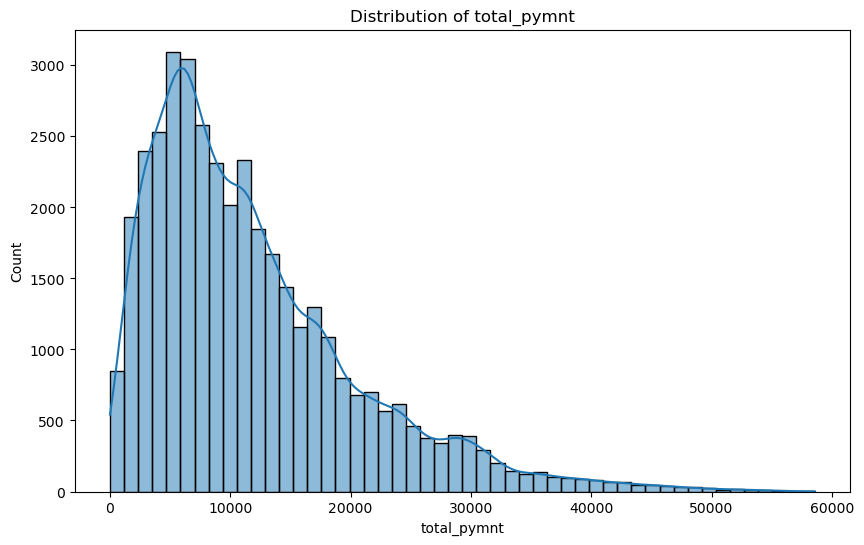

c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


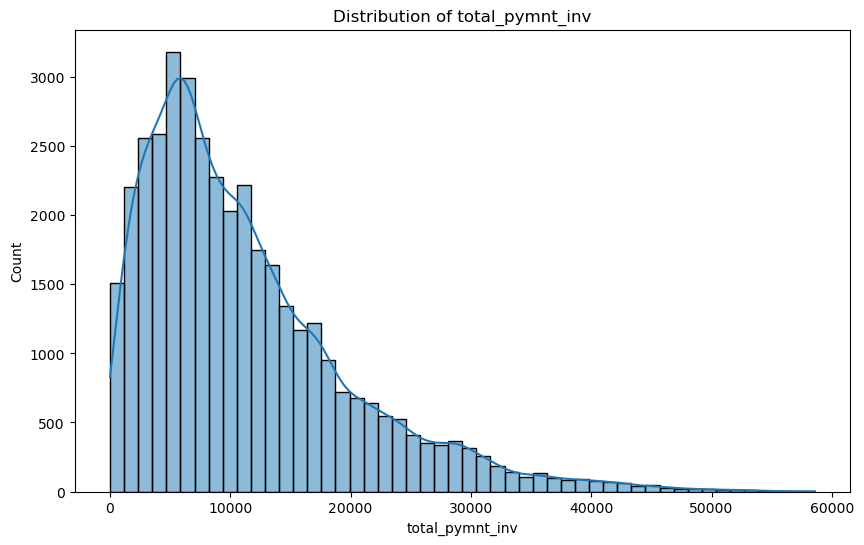

c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


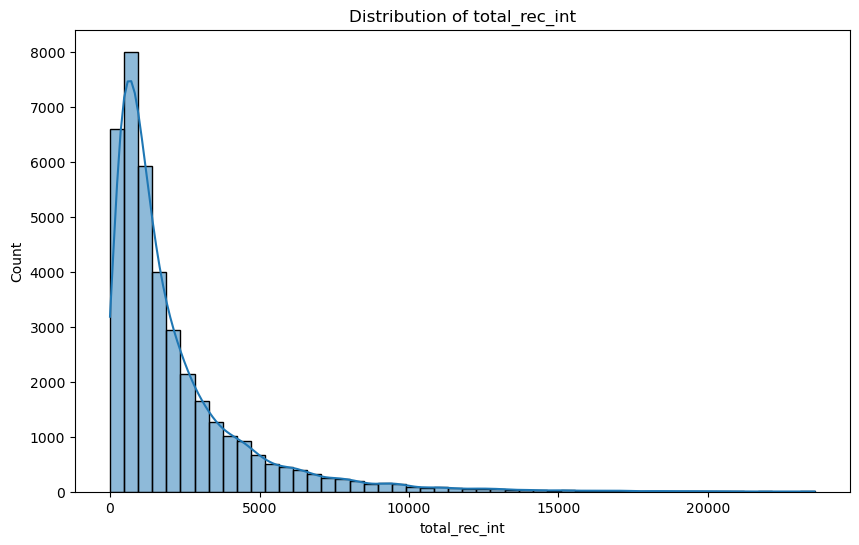

c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


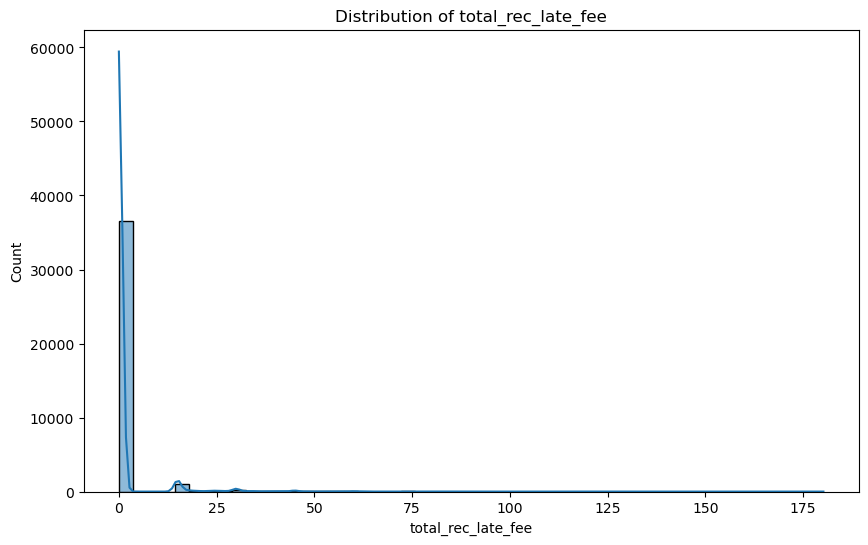

c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


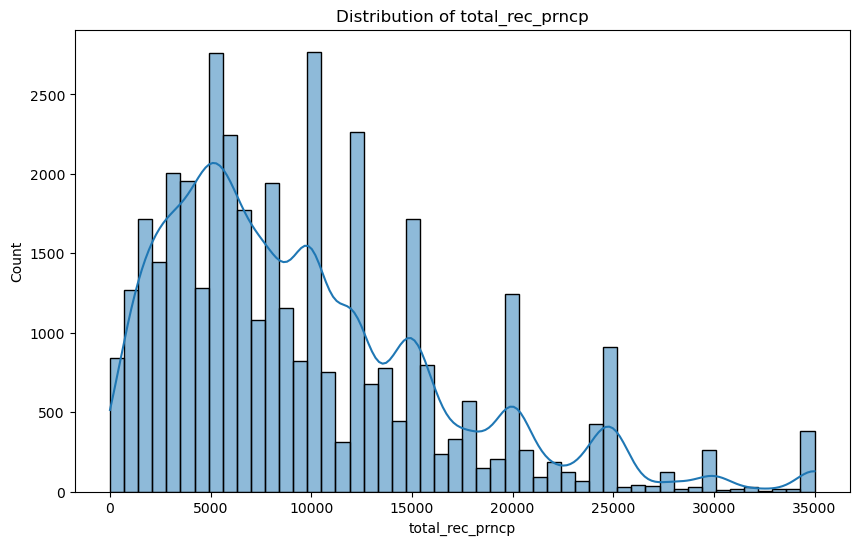

In [28]:
# Summary statistics
summary_stats = df_cleaned[['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']].describe()
print(summary_stats)

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Below two column are very much correlated, as its reflected in the histplot and the heatmap as well.
# - total_pymnt
# - total_pymnt_inv
# - total_rec_int
# - total_rec_prncp
# - totla_rec_late_fee

# Only one columns which is completely not related are below.
# - total_rec_late_fee  


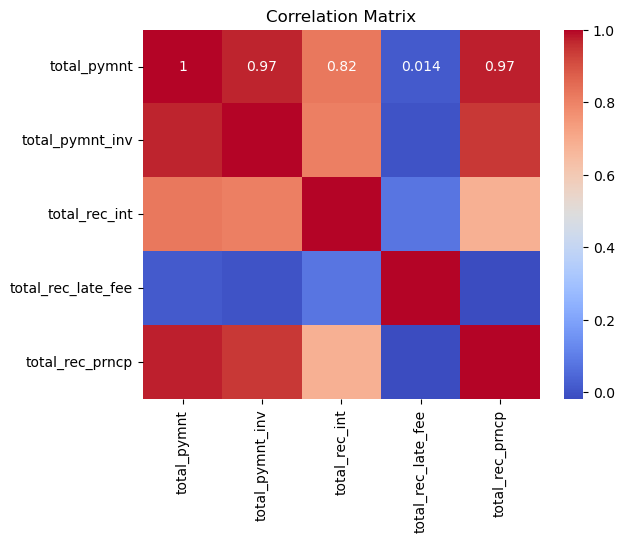

In [29]:
# Correlation matrix
correlation_matrix = df_cleaned[['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [30]:
df_cleaned.loan_status.unique()

# 1 => 'Fully Paid', 2 => 'Charged Off', 3 => 'Current'

def getLoanStatusEnumValue(loanStatus):
    if loanStatus == "Fully Paid":
        return 1
    elif loanStatus == "Charged Off":
        return 2
    return 0

df_cleaned["loan_status_number"] = df_cleaned.loan_status.apply(lambda x : getLoanStatusEnumValue(x))
df_cleaned.shape

(38577, 42)

C:\Users\dsharma6\AppData\Local\Temp\ipykernel_8936\1662791845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amt_group = df_cleaned.groupby('loan_status')['loan_amnt']
c:\Users\dsharma6\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


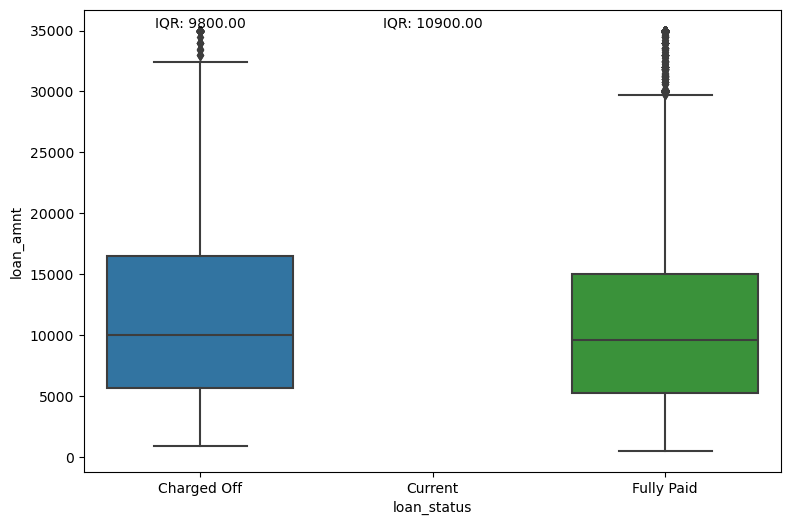

loan_status
Charged Off    31825.0
Current            NaN
Fully Paid     28000.0
Name: loan_amnt, dtype: float64

In [31]:
plt.figure(figsize=(9, 6))
# Calculate IQR for each category
loan_amt_group = df_cleaned.groupby('loan_status')['loan_amnt']
iqr_values = loan_amt_group.quantile(0.75) - loan_amt_group.quantile(0.25)

sns.boxplot(x=df_cleaned.loan_status, y = df_cleaned.loan_amnt)
for i, category in enumerate(df_cleaned['loan_status'].unique()):
    plt.text(i, df_cleaned[df_cleaned['loan_status'] == category]['loan_amnt'].max() + 0.1, f'IQR: {iqr_values[category]:.2f}', ha='center', va='bottom')

plt.show()
loan_amt_group.quantile(0.97)

#Observations.
# As you can see that there are outliers in the charged off and fully paid data, we can remove in relation to loan_amount.

In [32]:
plt.figure(figsize=(9, 6))

# Create a figure and a set of subplots
# fig, axs = plt.subplots(13, 2, figsize=(32, 12))

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='viridis')


# sns.boxplot(df_cleaned[["pub_rec_bankruptcies","loan_status_number"]].corr(), ax=axs[0,0])
# sns.heatmap(df_cleaned[["loan_amnt","loan_status_number"]].corr(), ax=axs[0,1])

# sns.heatmap(df_cleaned[["funded_amnt","loan_status_number"]].corr(), ax=axs[1,0])
# sns.heatmap(df_cleaned[["funded_amnt_inv","loan_status_number"]].corr(), ax=axs[1,1])

# sns.heatmap(df_cleaned[["installment","loan_status_number"]].corr(), ax=axs[2,0])
# sns.heatmap(df_cleaned[["annual_inc","loan_status_number"]].corr(), ax=axs[2,1])

# sns.heatmap(df_cleaned[["dti","loan_status_number"]].corr(), ax=axs[3,0])
# sns.heatmap(df_cleaned[["delinq_2yrs","loan_status_number"]].corr(), ax=axs[3,1])

# sns.heatmap(df_cleaned[["delinq_2yrs","loan_status_number"]].corr(), ax=axs[4,0])
# sns.heatmap(df_cleaned[["delinq_2yrs","loan_status_number"]].corr(), ax=axs[4,1])

# sns.heatmap(df_cleaned[["inq_last_6mths","loan_status_number"]].corr(), ax=axs[5,0])
# sns.heatmap(df_cleaned[["open_acc","loan_status_number"]].corr(), ax=axs[5,1])

# sns.heatmap(df_cleaned[["pub_rec","loan_status_number"]].corr(), ax=axs[6,0])
# sns.heatmap(df_cleaned[["revol_bal","loan_status_number"]].corr(), ax=axs[6,1])

# sns.heatmap(df_cleaned[["total_acc","loan_status_number"]].corr(), ax=axs[7,0])
# sns.heatmap(df_cleaned[["out_prncp","loan_status_number"]].corr(), ax=axs[7,1])

# sns.heatmap(df_cleaned[["out_prncp_inv","loan_status_number"]].corr(), ax=axs[8,0])
# sns.heatmap(df_cleaned[["total_pymnt","loan_status_number"]].corr(), ax=axs[8,1])

# sns.heatmap(df_cleaned[["total_pymnt_inv","loan_status_number"]].corr(), ax=axs[9,0])
# sns.heatmap(df_cleaned[["total_rec_prncp","loan_status_number"]].corr(), ax=axs[9,1])

# sns.heatmap(df_cleaned[["total_rec_int","loan_status_number"]].corr(), ax=axs[10,0])
# sns.heatmap(df_cleaned[["total_rec_late_fee","loan_status_number"]].corr(), ax=axs[10,1])

# sns.heatmap(df_cleaned[["recoveries","loan_status_number"]].corr(), ax=axs[11,0])
# sns.heatmap(df_cleaned[["collection_recovery_fee","loan_status_number"]].corr(), ax=axs[11,1])

# sns.heatmap(df_cleaned[["last_pymnt_amnt","loan_status_number"]].corr(), ax=axs[12,0])
# sns.heatmap(df_cleaned[["pub_rec_bankruptcies","loan_status_number"]].corr(), ax=axs[12,1])





# charged_off_loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
#        'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
#        'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
#        'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
#        'total_rec_int', 'total_rec_late_fee', 'recoveries',
#        'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies','loan_status_number']]

plt.show()

ValueError: could not convert string to float: 'B'

<Figure size 900x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

['loan_amnt']


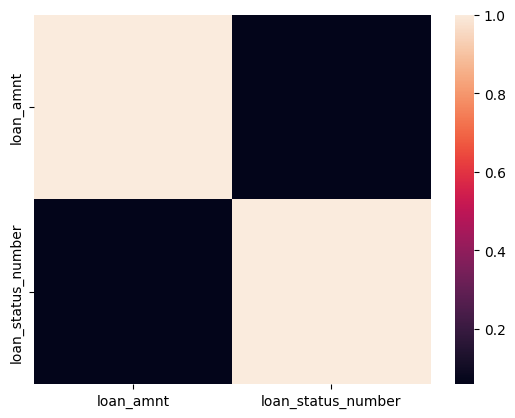

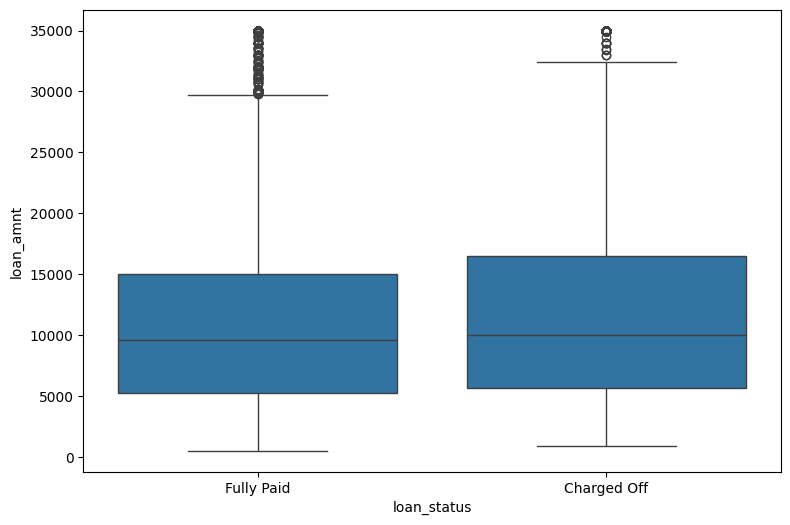

In [ ]:

# Drop non-numeric columns if necessary
charged_off_loan = df_cleaned
charged_off_loan = charged_off_loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies','loan_status_number']]

# Compute the correlation matrix
# corr = df_numeric.corr()

# Generate a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".2f")
# # Customize hover functionality
# plt.gca().set_facecolor('xkcd:salmon')  # Set background color
# plt.title('Correlation Heatmap')  # Set plot title
# plt.gca().set_aspect('auto')  # Adjust aspect ratio
# plt.show()
#data = df_cleaned.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = charged_off_loan.corr()
sns.heatmap(corr_matrix)
# # Create hover text
# hover_text = [[f'Correlation row : {corr_matrix.columns[i]} , column : {corr_matrix.columns[j]} : {corr_matrix.iloc[i, j]:.2f}' for j in range(len(corr_matrix))] for i in range(len(corr_matrix))]
# charged_off_loan.head()
# # # Create a heatmap
# fig = go.Figure(data=go.Heatmap(
#     z=corr_matrix.values,
#     x=corr_matrix.columns,
#     y=corr_matrix.index,
#     colorscale='RdBu_r',
#     hoverongaps=False,
#     hoverinfo='text',
#     text=hover_text
# ))

# # # Update layout for better readability
# fig.update_layout(
#     title='Correlation Heatmap with Hover Numbers',
#     xaxis_nticks=36,
#     xaxis_title='Features',
#     yaxis_title='Features'
# )

# # # Show the figure
# fig.show()

columns_to_focus = corr_matrix[corr_matrix["loan_status_number"] > .5].index.to_list()
columns_to_drop = [item for item in charged_off_loan.columns if item not in columns_to_focus]
print(columns_to_drop)

plt.figure(figsize=(9, 6))
sns.boxplot(x=df_cleaned.loan_status, y = df_cleaned.loan_amnt)
plt.show()
